# Linear/Quadradic Discriminant Analysis

# Introduction

**WIP**

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. But can also be use as classifier. LDA is supervised algorithm (requires labeled data). The terms Fisher's linear discriminant, LDA and Quadratic Linear Discriminant QDA are often used interchangeably, but there are differences (See  [this](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [this](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis) for better disambiguation):

* QDA and LDA are classifier technique. QDA is more general than LDA. The main assumptions are:    

    * The data are normally distributed. Multivariate Gaussians ($ N( x|  \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}} \exp{\left[\frac{1}{2}( x-  \mu)\Sigma^{-1}( x-  \mu)^t\right]}$) are used to score a new unlabeled data (Both QDA and LDA).   
        
        - LDA assume all classes follows the same distribution ( **homosdacity** ), So all covariance matrix are identical.  

        - LDA assumes no multicollinearity between features. **Multicollinearity** can degraded prediction performance   
    * The observations are independent: features are assumed to be randomly sampled (Both QDA and LDA).    


LDA has been empirical verified to be relatively robust to slight violations of these assumptions. However, LDA is quite sensitive to outliers and the size of the smallest group must be larger (NICE to HAVE) than the number of predictor variables

* Fishers LDA is dimension reduction technique.  It does not make assumption such as normality.   

In this notebook we mainly will be talking about Fishers LDA and later will discuss about QDA and LDA as predictors. We normally use the word LDA to refers to Fishers LDA. For simplicity, the practical aspect of Fishers LDA will be explained utilzing a 2 class problem and bi-dimensional data.

## What is LDA

In the figure below describe LDA being applied to a bidimensional dataset containing 2 classes. The dataset is a set of $n$ d-dimensional samples $X = \{x_1, x_2, ..., x_n\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,2$ where $x_i^{(k)}$ is a vector of dimension $d$. A new data $x_{new}$ is introduced in the graph and the goal of QDA/LDA is to determine which class $x_{new}$ belongs to.

<img src="images/lda_predictor.png" width="400"/>

The assumption of Linear and Quadradict discriminant analsys is that each class can be modelled by multivariate gaussian.

$ 
N( x|  \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma_k|}} \exp{\left[\frac{1}{2}( x-  \mu_k)\Sigma_k^{-1}( x-  \mu_k)^t\right]}
$

The parameters of the Gaussian of each class can be estimated by using the mean and covariance of each group $X^{(k)}$.

for QDA
$
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$ for $x \in X^{(k)}$  or for LDA $
\boldsymbol\Sigma_k = \begin{bmatrix}
 \sigma^2 & 0 \\
 0 &  \sigma^2
\end{bmatrix}
$.

where the index $i$ denotes the dimension of $x$ and $x \in X^{(k)}$. Using Bayes theorem we can compute the probability that $x$ belongs to a class $k$ by:

$
P(C=k|X=x) = \frac{P(X=x|C=k)P(C=k)}{P(X=x)}
$

Where $P(X=x|C=k) = N( x|  \mu_k, \Sigma_k)$ and $P(C=k) = N_k/N$ and assuming $P(X=x) = const$ is an uniform.
$P(C=k|X=x)$ gives the probability of $x$ belongs to class $k$ and it is known as likelihood. Taking the log of likelihood and ignoring the denominator we have the score function:

$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)\Sigma_k^{-1}(x - \mu_k)^t + \log \pi_k
$

$x_{new}$ will be labeled comparing the probabilities $\delta_k(x_{new})$.


### Summarizing the LDA/QDA approach in 5 steps

In practice the parameters of the Gaussian distribution are unknown or can be estimated by. Below there are 5 steps to take to label a new data using QDA/LDA.

1. $\pi_k = N_k /N$, where $N_k$ is the number of observations in class k
2. $\hat{\mu_k} =  \frac{1}{N_k} \sum_{x_i\in X^{(k)}}  x_i^{(k)} \equiv mean(X^{(k)})$
3. $\hat{\Sigma_k} = \frac{1}{N_k -1}\sum_{x_i\in X^{(k)}} ( x_i^{(k)} -  \hat{\mu_k}) ( x_i^{(k)} - \hat{\mu_k})^t \equiv Cov(X^{k})$
4. Compute $\delta_k(x)$, the score function
5. assign label of the new data to the class with large $\delta_k(x)$.



In [17]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import scipy.stats as stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

1. load data
3. Summarize data
    * Global covariance matrix
    * Using the formula
    * Using numpy.cov
    * Visualize data

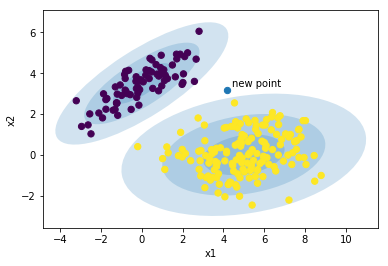

,label,x,y
199,2,3.159009,-1.113486
64,1,1.077114,4.169048
57,1,-1.764373,2.706935
72,1,-2.107472,2.049191
201,2,5.963527,-0.071601


Global data mean:


array([3.3263, 1.1925])

Global data variance:


array([8.3661, 3.5407])

Global Covariance matrix:


array([[ 8.4035, -3.2224],
       [-3.2224,  3.5565]])

1st class true parmeters
 number of samples in first group N1: 75

 mean mu1:


[0.0, 3.5]

 Covariance matrix:


[[2.0, 1.1], [1.1, 1.0]]

2nd class true parmeters
 number of samples in first group N1: 150

 mean mu2:


[5.0, 0.0]

 Covariance matrix:


[[4.0, 0.5], [0.5, 1.0]]

In [3]:
%run simulated_data.ipynb

X = df[['x','y']].values
N = X.shape[0]

X1 = df.loc[df.label ==1,['x','y']].values
N1 = X1.shape[0] 

X2 = df.loc[df.label ==2,['x','y']].values
N2 = X2.shape[0] 

df.sample(5).head(5)

total_variance = np.var(X,axis=0)
m = np.mean(X,axis=0)

print('Global data mean:')
m

print('Global data variance:')
total_variance

print('Global Covariance matrix:')
S = np.cov(X[:,0],X[:,1])
S

print('1st class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N1))

print(' mean mu1:')
mu1

print(' Covariance matrix:')
Sigma1

print('2nd class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N2))

print(' mean mu2:')
mu2

print(' Covariance matrix:')
Sigma2

In [4]:
def estimate_gaussian_parameters(Xk):

    mk = np.mean(Xk,axis=0)
    Sk = np.cov(Xk[:,0],Xk[:,1])
    return mk, Sk

def get_lda_paramaters(Xk,N):
    
    Nk = Xk.shape[0]
    
    pik = Nk/N
    
    mk, Sk = estimate_gaussian_parameters(Xk)
    
    Sk_inv = np.linalg.inv(Sk)
    
    return Sk_inv, pik

def lda_score(X_new,mk, Sk,Sk_inv, pik):
    
    scorek = -0.2*np.log(np.linalg.det(Sk)) 
    uk = X_new - mk
    Ak = np.matmul(Sk_inv,uk.T)
    scorek = scorek - 0.5*np.matmul(uk,Ak) 
    scorek += np.log(pik)
    
    return scorek

## Before start shoulf be good to check assumptions

 ### check normality

In order to test if a data follows a multivariate normal distribution is to test normality of each variable using [ks](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test). An alternative way is to plot the histogram of each dimension visual expect the graph and compute the kurtosis and skeness of the data histogram. For normal distributions the kurtosis and skeness should be zero.

* Group 1: $X^{(1)}$

Group1: 


(array([ 5.,  6., 10., 13., 15., 13.,  8.,  5.]),
 array([-3.2155, -2.4627, -1.71  , -0.9572, -0.2045,  0.5483,  1.301 ,
         2.0538,  2.8065]),
 <a list of 8 Patch objects>)

Text(0.5,0,' x1')

(array([ 3.,  4.,  9., 15., 15., 17., 10.,  1.,  1.]),
 array([1.0268, 1.5859, 2.1449, 2.704 , 3.2631, 3.8222, 4.3812, 4.9403,
        5.4994, 6.0585]),
 <a list of 9 Patch objects>)

Text(0.5,0,'x2')

 kurtosis: -0.025099736326808397
 skeness: -0.15291298327640995


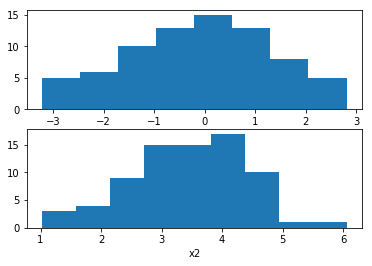

In [25]:
print('Group1: ')
plt.subplot(211)
plt.hist(X1[:,0], bins='auto')
plt.xlabel(" x1")

plt.subplot(212)
plt.hist(X1[:,1], bins='auto')
plt.xlabel("x2")

print(' kurtosis: {}'.format(stats.kurtosis(X1[:,1])))
print(' skeness: {}'.format(stats.skew(X1[:,1])))

* Group 2: $X^{(2)}$

Group2: 


(array([ 1.,  4.,  5.,  8., 23., 22., 29., 22., 15., 16.,  5.]),
 array([-0.2022,  0.6157,  1.4337,  2.2516,  3.0696,  3.8875,  4.7055,
         5.5234,  6.3414,  7.1593,  7.9772,  8.7952]),
 <a list of 11 Patch objects>)

Text(0.5,0,'Group2: x1')

(array([ 4.,  9., 17., 31., 31., 21., 18., 17.,  2.]),
 array([-2.4664, -1.9097, -1.353 , -0.7963, -0.2397,  0.317 ,  0.8737,
         1.4304,  1.9871,  2.5437]),
 <a list of 9 Patch objects>)

Text(0.5,0,'Group2: x2')

 kurtosis: -0.025099736326808397
 skeness: -0.15291298327640995


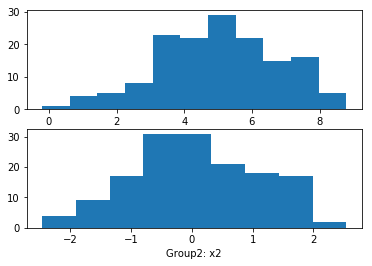

In [26]:
print('Group2: ')

plt.subplot(211)
plt.hist(X2[:,0], bins='auto')
plt.xlabel("Group2: x1")

plt.subplot(212)
plt.hist(X2[:,1], bins='auto')
plt.xlabel("Group2: x2")

print(' kurtosis: {}'.format(stats.kurtosis(X1[:,1])))
print(' skeness: {}'.format(stats.skew(X1[:,1])))

So, kurtosis and skewness are not that bad. We were expecting values close to zero because the simulated data was created by using multivariate Gaussian. The differences are related to the small sample size of each group.

## Estimating All parameters

* Estimating Gaussian parameters
* Comparing with the true values

In [28]:
m1, S1 = estimate_gaussian_parameters(X1)
m1
mu1  # True value
Sigma1 # True value
S1

m2, S2= estimate_gaussian_parameters(X2)
m2
mu2 # True value
Sigma2 # True value
S2

array([-0.0424,  3.4462])

[0.0, 3.5]

[[2.0, 1.1], [1.1, 1.0]]

array([[2.0361, 1.1041],
       [1.1041, 0.9242]])

array([5.0107, 0.0657])

[5.0, 0.0]

[[4.0, 0.5], [0.5, 1.0]]

array([[3.0538, 0.3394],
       [0.3394, 1.0529]])

* Estimating the other parameters
* checking the inverse matrix

In [6]:
S1_inv, pi1 = get_lda_paramaters(X1,N)
np.matmul(S1_inv,S1)

S2_inv, pi2 = get_lda_paramaters(X2,N)
np.matmul(S2_inv,S2)

array([[ 1.0000e+00, -1.5499e-16],
       [-6.3325e-17,  1.0000e+00]])

array([[ 1.0000e+00, -9.0503e-18],
       [ 2.4710e-17,  1.0000e+00]])

## Computing the scores and labelling new data

* Computing the scores

In [8]:
s1 = lda_score(x_new,m1, S1,S1_inv, pi1)
s2 = lda_score(x_new,m2, S2,S2_inv, pi2)

s1
s2

if s1 > s2:
    label_new = 1
else:
    label_new = 2

label_new

-15.400251452864849

-5.859976088837683

2

## Verifying the scores by labeling input data


* labeling mean point of each group: $X^{(1)}$ and $X^{(2)}$
* labeling first data in the second group $X^{(2)}$
* labeling $x = (0,0)$ 


In [11]:

print('labeling centroids of each group')
print(' group 1')
s1 = lda_score(m1,m1, S1,S1_inv, pi1)
s2 = lda_score(m1,m2, S2,S2_inv, pi2)

s1
s2

assert s1 > s2

print(' group 2')
s1 = lda_score(m2,m1, S1,S1_inv, pi1)
s2 = lda_score(m2,m2, S2,S2_inv, pi2)

s1
s2

assert s2 > s1

print('labeling 1st point of the 2nd group')
X2[0,:]
s1 = lda_score(X2[0,:],m1, S1,S1_inv, pi1)
s2 = lda_score(X2[0,:],m2, S2,S2_inv, pi2)

s1
s2

assert s2 > s1

print('labeling point (0,0)')
s1 = lda_score([0,0],m1, S1,S1_inv, pi1)
s2 = lda_score([0,0],m2, S2,S2_inv, pi2)

s1
s2


labeling centroids of each group
 group 1


-1.016312869857339

-12.466343637060453

 group 2


-64.84096348877318

-0.6317630899401749

labeling 1st point of the 2nd group


array([ 5.0325, -0.8389])

-83.4195401902613

-1.036977973472295

labeling point (0,0)


-19.506637147958983

-4.861380154688518

Text(4.41,3.36,'new point')

Text(0.5,0,'x1')

Text(0,0.5,'x2')

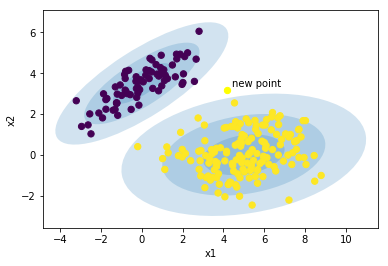

In [12]:
ax = plt.gca()

## Confusion. Maybe is not worthwhile
label_color = 'yellow' if label_new == 2 else 2

plot_gmm(initial_guess, X, label=labels, ax=ax)

ax.scatter(x_new[0], x_new[1], s=40, c=label_color, cmap='viridis', zorder=2)
ax.text( x_new[0]*1.05,x_new[1]*1.05, 'new point')
plt.xlabel('x1')
plt.ylabel('x2')